In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False


from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

* 매출액별 영업이익 데이터 구하기 

In [6]:
machul_path = f'data/부산_읍면동별_매출액.20200922185219.csv'
machul_raw = pd.read_csv(machul_path, encoding='cp949')
select_col = machul_raw[['행정구역별', '매출액', '영업이익']]
machul_data = select_col.drop(0)
machul_data

,행정구역별,매출액,영업이익
1,중구,4440633,232798
2,중앙동,2372572,91178
3,동광동,362784,20825
4,대청동,53604,3644
5,보수동,100693,5942
...,...,...,...
218,기장읍,864486,55339
219,장안읍,317900,17615
220,정관읍,628504,38207
221,일광면,202862,9702


In [7]:
hjdong = ['중앙동', '동광동', '대청동', '보수동', '부평동', '광복동', '남포동', '영주1동', '영주2동',
       '동대신1동', '동대신2동', '동대신3동', '서대신1동', '서대신3동', '서대신4동', '부민동',
       '아미동', '초장동', '충무동', '남부민1동', '남부민2동', '암남동', '초량1동', '초량2동',
       '초량3동', '초량6동', '수정1동', '수정2동', '수정4동', '수정5동', '범일1동', '범일2동',
       '범일5동', '남항동', '영선1동', '영선2동', '신선동', '봉래1동', '봉래2동', '청학1동',
       '청학2동', '동삼1동', '동삼2동', '동삼3동', '부전1동', '부전2동', '연지동', '초읍동',
       '양정1동', '양정2동', '전포1동', '전포2동', '부암1동', '부암3동', '당감1동',
       '당감2동', '당감4동', '가야1동', '가야2동', '개금1동', '개금2동', '개금3동',
       '범천1동', '범천2동', '수민동', '복산동', '명륜동', '온천1동', '온천2동', '온천3동',
       '사직1동', '사직2동', '사직3동', '안락1동', '안락2동', '명장1동', '명장2동',
       '대연1동', '대연3동', '대연4동', '대연5동', '대연6동', '용호1동', '용호2동', '용호3동',
       '용호4동', '용당동', '감만1동', '감만2동', '우암동', '문현1동', '문현2동', '문현3동',
       '문현4동', '구포1동', '구포2동', '구포3동', '금곡동', '화명1동', '화명2동',
       '화명3동', '덕천1동', '덕천2동', '덕천3동', '만덕1동', '만덕2동', '만덕3동',
       '우1동', '우2동', '중1동', '중2동', '좌1동', '좌2동', '좌3동', '좌4동',
       '송정동', '반여1동', '반여2동', '반여3동', '반여4동', '반송1동', '반송2동',
       '재송1동', '재송2동', '괴정1동', '괴정2동', '괴정3동', '괴정4동', '당리동', '하단1동',
       '하단2동', '신평1동', '신평2동', '장림1동', '장림2동', '다대1동', '다대2동', '구평동',
       '감천1동', '감천2동', '서1동', '서2동', '서3동', '부곡1동', '부곡2동', '부곡3동',
       '부곡4동', '장전1동', '장전2동', '장전3동', '선두구동', '청룡노포동', '남산동', '구서1동',
       '구서2동', '금성동', '대저1동', '대저2동', '강동동', '가락동', '녹산동', '가덕도동', '거제1동',
       '거제2동', '거제3동', '거제4동', '연산1동', '연산2동', '연산3동', '연산4동', '연산5동',
       '연산6동', '연산8동', '연산9동', '남천1동', '남천2동', '수영동', '망미1동', '망미2동',
       '광안1동', '광안2동', '광안3동', '광안4동', '민락동', '삼락동', '모라1동', '모라3동',
       '덕포1동', '덕포2동', '괘법동', '감전동', '주례1동', '주례2동', '주례3동', '학장동', '엄궁동',
       '기장읍', '장안읍', '일광면', '철마면']

* 동별 데이터 합산

In [8]:
def dong(df) :
    # 바뀐 행정동 명 없애기
    temp = []
    drop_index = []
    gu_hjdong = df['행정구역별'].tolist()
    for i in gu_hjdong :
        if i not in hjdong:
            temp.append(i)
    for i in temp:
        drop_index.append(df[df['행정구역별']==i].index[0])   
    
    for i in range(1, len(df['행정구역별'])+1):
        if (df['행정구역별'][i][-1] == '구') or (df['행정구역별'][i][-1] == '군'):
            drop_index.append(i)
    df = df.drop(drop_index)

    return df
machul = dong(machul_data)

In [9]:
machul['매출액 대비 영업이익'] = machul['영업이익']/machul['매출액']*100
machul

,행정구역별,매출액,영업이익,매출액 대비 영업이익
2,중앙동,2372572,91178,3.843002
3,동광동,362784,20825,5.740330
4,대청동,53604,3644,6.798000
5,보수동,100693,5942,5.901105
6,부평동,286774,28931,10.088432
...,...,...,...,...
216,감전동,4339403,199907,4.606786
218,기장읍,864486,55339,6.401376
219,장안읍,317900,17615,5.541051
221,일광면,202862,9702,4.782562


In [10]:
df = pd.DataFrame({"행정동명":hjdong ,"매출액 대비 영업이익":machul['매출액 대비 영업이익']})
df.to_csv('data/부산_읍면동별_매출대비이익.csv', encoding='euc-kr')

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

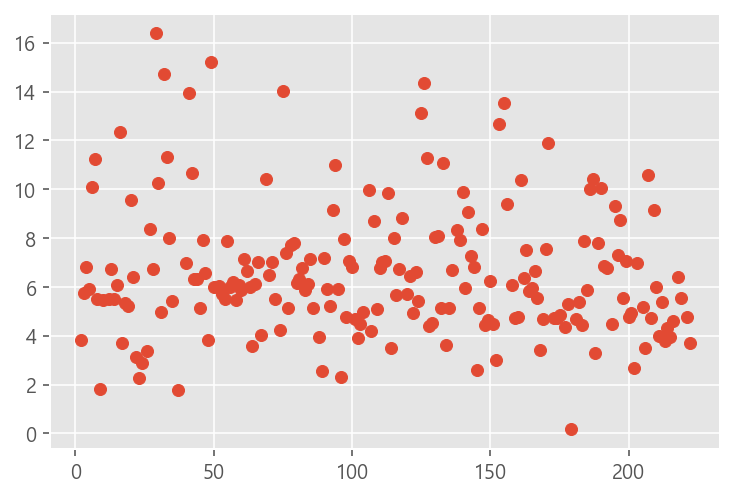

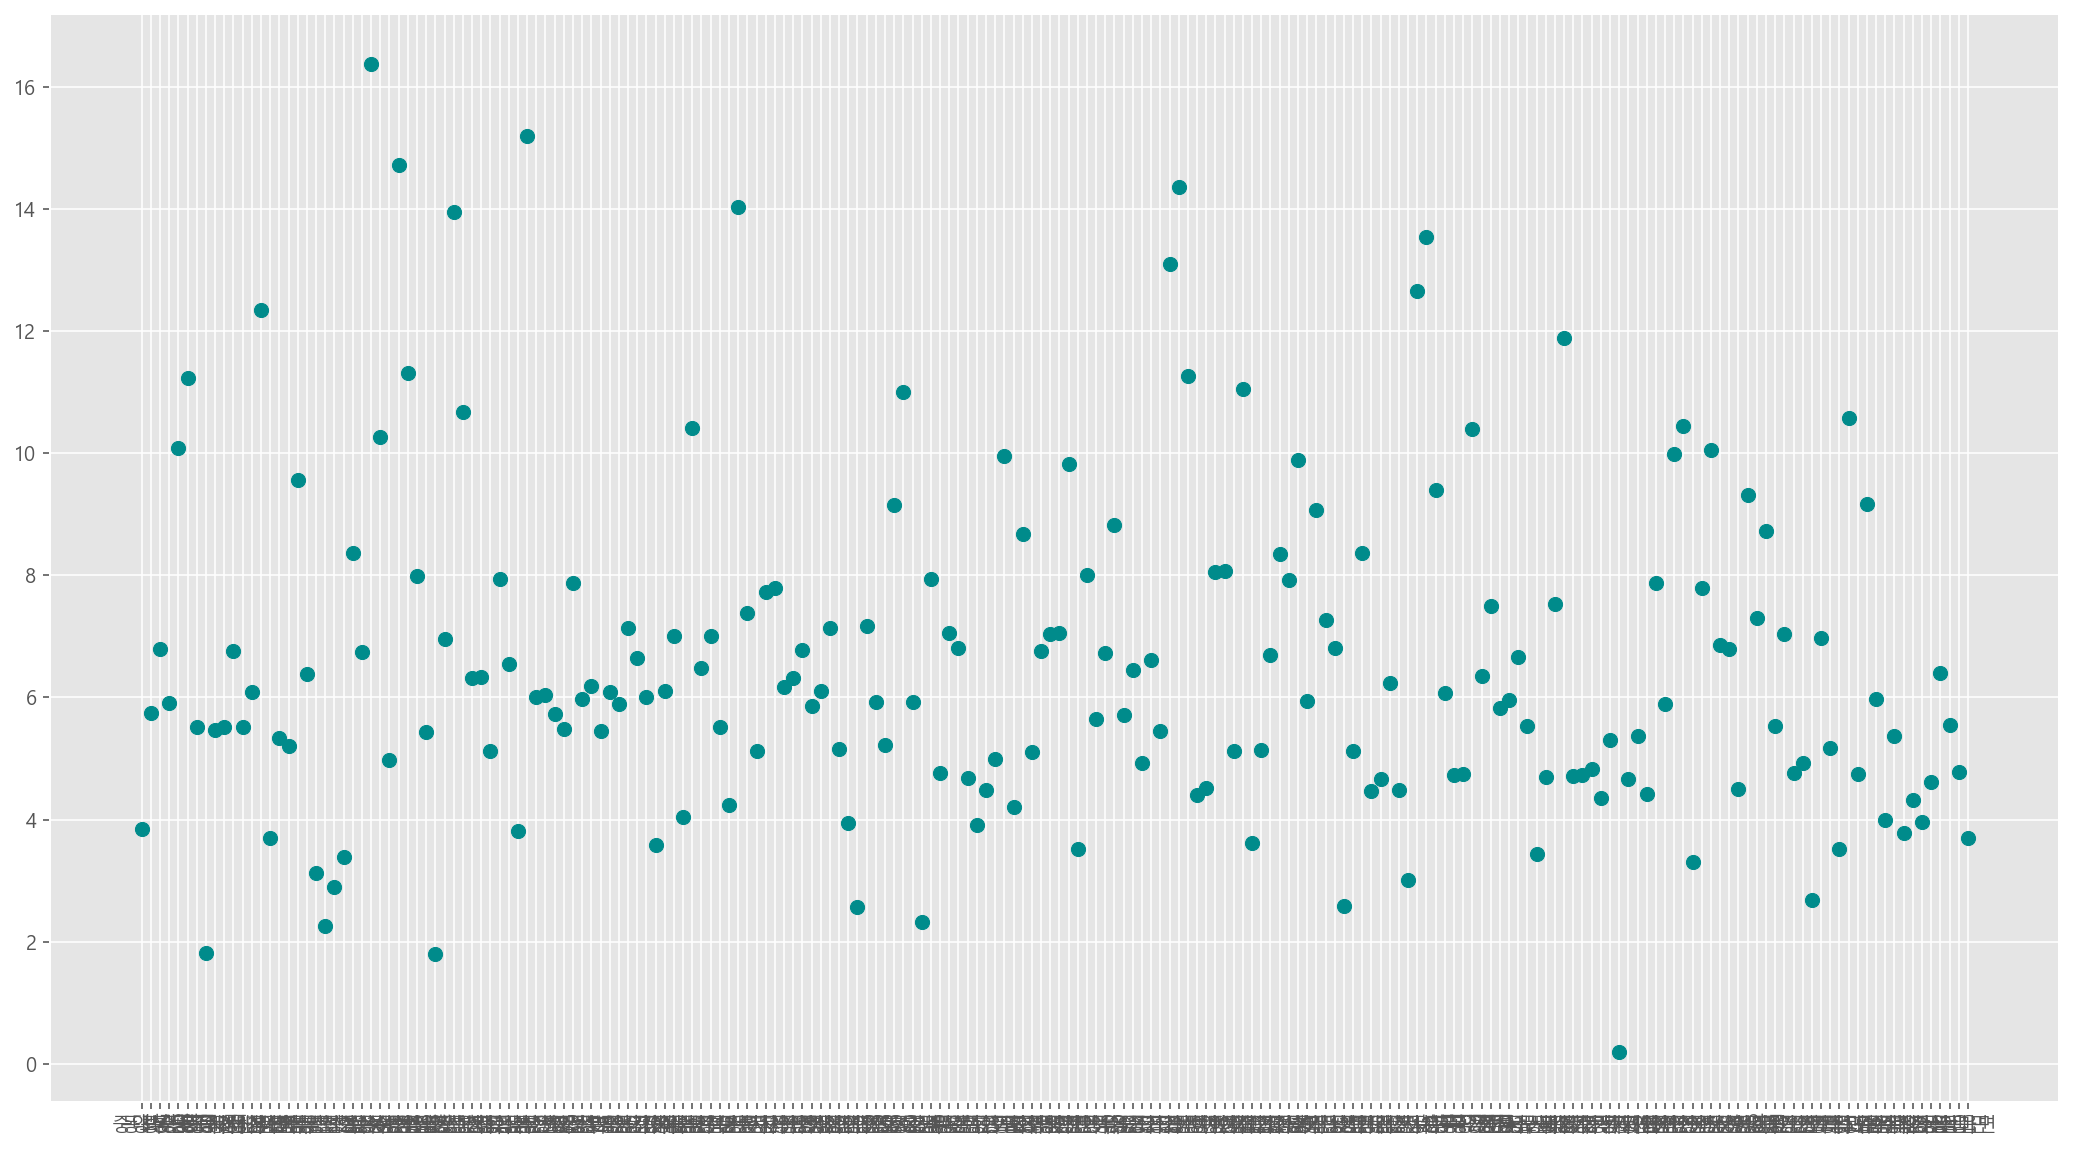

In [11]:
import seaborn as sns

plt.scatter(df.index, df['매출액 대비 영업이익'])
plt.figure(figsize=(18, 10))
plt.scatter(df['행정동명'], df['매출액 대비 영업이익'], color='darkcyan', s=50)
sns.regplot(df['행정동명'], df['매출액 대비 영업이익'], scatter=False, color='darkcyan')
plt.xticks(rotation=90)
for name in df.index:
    plt.text(df['행정동명'][name]*1.02, df['매출액 대비 영업이익'][name], name, fontsize=13)
        
plt.show()